In [1]:
print("Our ANN Model")

Our ANN Model


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv("D:\pds_project\Churn_Modelling.csv")
#print(dataset)
x=dataset.iloc[:,3:13]# independant feature
y=dataset.iloc[:,13]# dependant feature
#print("X",x)
print("Y",y)

Y 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [4]:
#create dummy features of Geography and Gender column of dataset
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x["Gender"],drop_first=True)
#print(geography,gender)


#Conctenate the data frame
x=pd.concat([x,geography,gender],axis=1)
#print(X)


#Drop Unneccesary columns
x=x.drop(["Geography","Gender"],axis=1)
print(x)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0                  1        101348.88        0      0     0  
1                  1   

In [5]:
#Splitting dataset into traning_set and test_set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#print(x_train)


#feature Scaling(minimizing)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
#print(x_train)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


#initializing the ANN model
model=Sequential()
#1 hidden layer
model.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu",input_dim=11))
#2hidden layer
model.add(Dense(units=6,kernel_initializer="he_uniform",activation="relu"))
#output layer
model.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [9]:
#compling the ANN
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#Fitting the ANN to the training
my_model=model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)


Epoch 1/100
536/536 [==============================] - 11s 14ms/step - loss: 0.5462 - accuracy: 0.7757 - val_loss: 0.4836 - val_accuracy: 0.7959
Epoch 2/100
536/536 [==============================] - 7s 13ms/step - loss: 0.4627 - accuracy: 0.8013 - val_loss: 0.4389 - val_accuracy: 0.8137
Epoch 3/100
536/536 [==============================] - 7s 13ms/step - loss: 0.4260 - accuracy: 0.8186 - val_loss: 0.4186 - val_accuracy: 0.8145
Epoch 4/100
536/536 [==============================] - 7s 13ms/step - loss: 0.4119 - accuracy: 0.8242 - val_loss: 0.4125 - val_accuracy: 0.8167
Epoch 5/100
536/536 [==============================] - 7s 13ms/step - loss: 0.4054 - accuracy: 0.8259 - val_loss: 0.4075 - val_accuracy: 0.8205
Epoch 6/100
536/536 [==============================] - 7s 13ms/step - loss: 0.4012 - accuracy: 0.8281 - val_loss: 0.4052 - val_accuracy: 0.8239
Epoch 7/100
536/536 [==============================] - 7s 13ms/step - loss: 0.3977 - accuracy: 0.8272 - val_loss: 0.4028 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


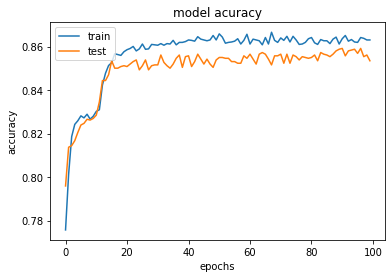

In [12]:
print(my_model.history.keys())
plt.plot(my_model.history["accuracy"])
plt.plot(my_model.history["val_accuracy"])
plt.title("model acuracy")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [15]:
y_pre=model.predict(x_test)
print(y_pre)
y_pre=(y_pre>0.5)
print(y_pre)

[[0.42318925]
 [0.29336533]
 [0.09150533]
 ...
 [0.15862404]
 [0.181988  ]
 [0.23986152]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [16]:
from sklearn.metrics import accuracy_score
score=c=accuracy_score(y_pre,y_test)
print(score)

0.8605


In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pre,y_test)
print(cm)

[[1508  192]
 [  87  213]]
